In [39]:
import pandas as pd 
import numpy as np
import os 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import scipy.stats as sp_stats
import matplotlib
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rc('text', usetex='false') 


import importlib 
import analyte_bar_functions as MS_bar 
importlib.reload(MS_bar)



<module 'analyte_bar_functions' from '/Users/evanlee/MSTP/Gordon/experiments/MG02_Pco_spec/hostMS/Gordon_MS/analyte_bar_functions.py'>

In [4]:
#Palettes and input/figure output directories 
csv_dir = "csv"
bar_figures_dir = "figures/analyte_bar"
os.makedirs(bar_figures_dir,exist_ok=True)

HWDC_bar_palette={"A":"#FEACA7","B":"#D4D4D4"}
HWDC_point_palette={"A":"#FF2804","B":"#000000"}

MG02_bar_palette ={"A":"#FEACA7","C":"#D4D4D4","D":"#9FC9EB"}
MG02_point_palette={"A":"#FF2804","C":"#000000","D":"#3E58A8"}
MG02_legend_labels = MS_bar.MG02_legend_labels

In [20]:
# MG02 Bile Acid Data 
# Bile Acids Data loading and metadata additions 

# Winnie: skip this cell, this is how I generated the table I sent to you 

# data_path = "{0}/MG02_bileacid_data.csv".format(csv_dir)
# data_df = pd.read_csv(data_path,header=0)
# data_df.rename(columns=lambda x: x.strip(),inplace=True)

# #Add in Sex and Group metadata columns based on Mouse_ID 
# data_df["Sex"] = data_df["Mouse_ID"].str.extract(r'[ABCD]([MF])\d+')
# data_df["Group"] = data_df["Mouse_ID"].str.extract(r'([ABCD])[MF]\d+')

# data_df = data_df[list(data_df.columns[:4])+list(data_df.columns[-2:])+list(data_df.columns[5:-2])]
# MG02_bile_acid_with_metadata_fpath = os.path.join(csv_dir,"MG02_bileacid_with_metadata.csv")
# data_df.to_csv(MG02_bile_acid_with_metadata_fpath)

/Users/evanlee/miniforge3/envs/gordon_tf/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


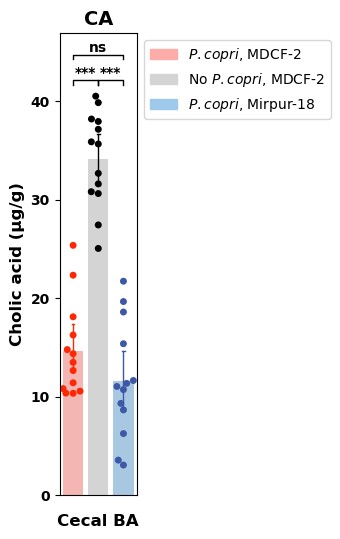

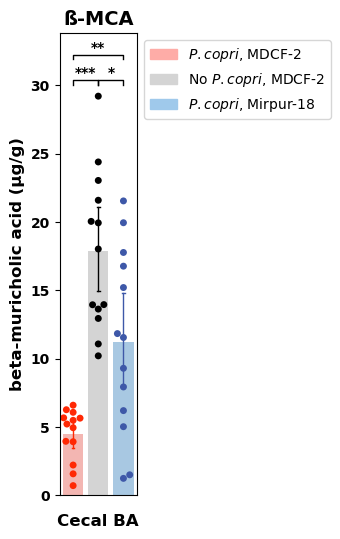

/Users/evanlee/miniforge3/envs/gordon_tf/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


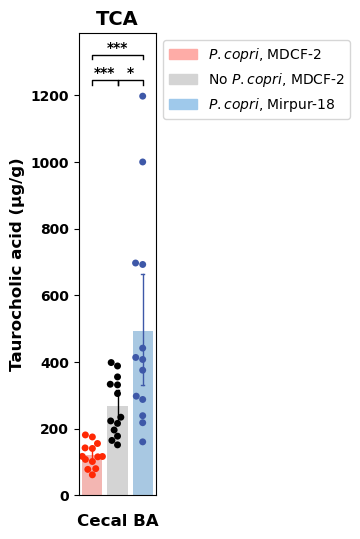

/Users/evanlee/miniforge3/envs/gordon_tf/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/evanlee/miniforge3/envs/gordon_tf/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


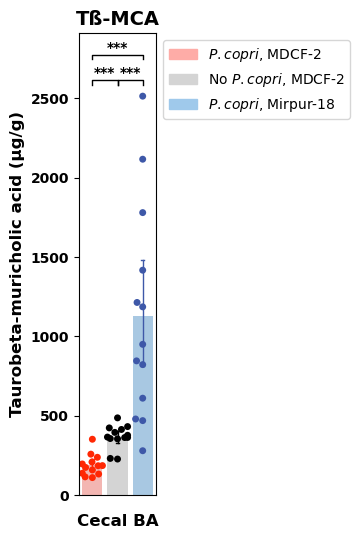

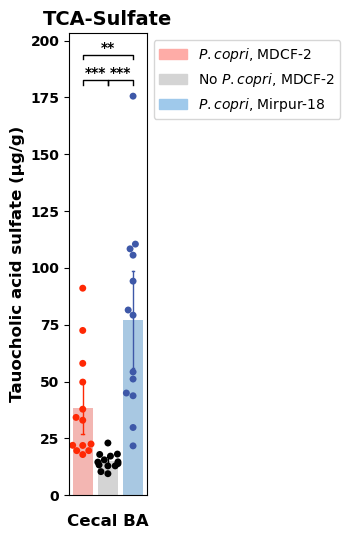

In [31]:
importlib.reload(MS_bar) #reload the helper functions to incorporate any changes made 

# #Bile Acids Data loading 
MG02_bile_acid_with_metadata_fpath = os.path.join(csv_dir,"MG02_bileacid_with_metadata.csv")
data_df = pd.read_csv(MG02_bile_acid_with_metadata_fpath,header=0,index_col=0)
data_df.rename(columns=lambda x: x.strip(),inplace=True)

# display(data_df)

fig_fmt="pdf"
bar_figures_dir = "figures/analyte_bar/cecal/{0}/MG02".format(fig_fmt)
os.makedirs(bar_figures_dir,exist_ok=True)

# analyte = "Cholic acid"
# BA_analytes = data_df.columns[8:].tolist()
BA_analytes = ["Cholic acid","beta-muricholic acid","Taurocholic acid","Taurobeta-muricholic acid","Tauocholic acid sulfate"]
BA_analytes_title_strs = ["CA","ß-MCA","TCA","Tß-MCA","TCA-Sulfate"]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for analyte,title_str in zip(BA_analytes,BA_analytes_title_strs):
        MS_bar.single_analyte_barplot(data_df,analyte=analyte,tissue="Cecal_BA",sampleID_col="Mouse_ID",sigstr_fmt="std",
                              units="µg/g",fig_fmt=fig_fmt,group_re="(A|C|D)",bar_palette=MG02_bar_palette,
                                     point_palette=MG02_point_palette,legend_labels=MG02_legend_labels,
                                     figures_dir=bar_figures_dir,title_str=title_str)


In [66]:
display(data_df)
importlib.reload(MS_bar)
test_long_df = MS_bar.tissue_analyte_long_df(data_df,["Cholic acid"],["Cecal_BA"],sampleID_col="Mouse_ID",
                                               group_re="([ABCD])")
# display(test_long_df)
for analyte in BA_analytes:
#     test_single_stats_df = MS_bar.single_analyte_stats(data_df,analyte,"Cecal_BA","Mouse_ID",split="group")
#     display(test_single_stats_df)
#     test_single_stats_df = MS_bar.single_analyte_stats(data_df,analyte,"Cecal_BA","Mouse_ID",split="sex")
#     display(test_single_stats_df)

    test_single_stats_df = MS_bar.single_analyte_stats(data_df,analyte,"Cecal_BA","Mouse_ID",split="cage_number")
    display(test_single_stats_df)

,Sample Number,Sac_Order,Mouse_ID,Cage_Number,Sex,Group,Cholic acid,beta-muricholic acid,Taurocholic acid,Taurobeta-muricholic acid,Tauocholic acid sulfate
0,1,MG02_F1,AF2,AF1,F,A,10.564608,3.917389,174.944722,239.057669,34.237032
1,2,MG02_F5,AF3,AF2,F,A,13.491240,6.260454,115.285706,186.749812,72.485534
2,3,MG02_F9,AF5,AF2,F,A,10.369613,5.484530,79.814836,111.202943,19.622327
3,4,MG02_F13,AF6,AF2,F,A,18.112969,5.665618,77.606124,133.556271,21.965409
4,5,MG02_F16,AF7,AF2,F,A,14.366393,3.947596,140.401402,159.259708,19.634235
5,6,MG02_F19,AF8,AF1,F,A,22.334973,6.070754,155.262625,258.822700,37.850118
6,7,MG02_F22,AF11,AF1,F,A,25.365500,6.592033,116.607757,175.189370,22.533190
7,8,MG02_M1,AM4,AM1,M,A,14.784526,4.943340,107.508942,138.288748,17.904224
8,9,MG02_M5,AM9,AM2,M,A,10.348184,5.210659,101.248997,196.963526,91.069764
9,10,MG02_M8,AM10,AM2,M,A,10.823156,1.567836,142.117543,209.480439,58.011339


,Analyte,stat,pval,sig_str,Comparison
0,Cholic acid,9.0,0.4,,AF1_AF2
1,Cholic acid,7.0,0.857143,,AF2_AM1
2,Cholic acid,6.0,0.7,,AM1_AM2
3,Cholic acid,6.0,0.7,,AF1_AM1
4,Cholic acid,8.0,0.628571,,AF2_AM2
5,Cholic acid,7.0,0.4,,AF1_AM2
0,Cholic acid,14.0,0.114286,,CF1_CF2
1,Cholic acid,8.0,0.730159,,CF2_CM1
2,Cholic acid,14.0,0.412698,,CF1_CM1
0,Cholic acid,7.0,0.555556,,DF2_DF1


,Analyte,stat,pval,sig_str,Comparison
0,beta-muricholic acid,7.0,0.857143,,AF1_AF2
1,beta-muricholic acid,11.0,0.114286,,AF2_AM1
2,beta-muricholic acid,2.0,0.4,,AM1_AM2
3,beta-muricholic acid,8.0,0.2,,AF1_AM1
4,beta-muricholic acid,9.0,0.4,,AF2_AM2
5,beta-muricholic acid,7.0,0.4,,AF1_AM2
0,beta-muricholic acid,9.0,0.885714,,CF1_CF2
1,beta-muricholic acid,7.0,0.555556,,CF2_CM1
2,beta-muricholic acid,5.0,0.285714,,CF1_CM1
0,beta-muricholic acid,7.0,0.555556,,DF2_DF1


,Analyte,stat,pval,sig_str,Comparison
0,Taurocholic acid,11.0,0.114286,,AF1_AF2
1,Taurocholic acid,7.0,0.857143,,AF2_AM1
2,Taurocholic acid,2.0,0.4,,AM1_AM2
3,Taurocholic acid,9.0,0.1,,AF1_AM1
4,Taurocholic acid,2.0,0.228571,,AF2_AM2
5,Taurocholic acid,5.0,1.0,,AF1_AM2
0,Taurocholic acid,4.0,0.342857,,CF1_CF2
1,Taurocholic acid,20.0,0.015873,*,CF2_CM1
2,Taurocholic acid,12.0,0.730159,,CF1_CM1
0,Taurocholic acid,10.0,1.0,,DF2_DF1


,Analyte,stat,pval,sig_str,Comparison
0,Taurobeta-muricholic acid,11.0,0.114286,,AF1_AF2
1,Taurobeta-muricholic acid,6.0,1.0,,AF2_AM1
2,Taurobeta-muricholic acid,0.0,0.1,,AM1_AM2
3,Taurobeta-muricholic acid,8.0,0.2,,AF1_AM1
4,Taurobeta-muricholic acid,0.0,0.057143,,AF2_AM2
5,Taurobeta-muricholic acid,4.0,1.0,,AF1_AM2
0,Taurobeta-muricholic acid,6.0,0.685714,,CF1_CF2
1,Taurobeta-muricholic acid,12.0,0.730159,,CF2_CM1
2,Taurobeta-muricholic acid,10.0,1.0,,CF1_CM1
0,Taurobeta-muricholic acid,10.0,1.0,,DF2_DF1


,Analyte,stat,pval,sig_str,Comparison
0,Tauocholic acid sulfate,9.0,0.4,,AF1_AF2
1,Tauocholic acid sulfate,7.0,0.857143,,AF2_AM1
2,Tauocholic acid sulfate,1.0,0.2,,AM1_AM2
3,Tauocholic acid sulfate,6.0,0.7,,AF1_AM1
4,Tauocholic acid sulfate,2.0,0.228571,,AF2_AM2
5,Tauocholic acid sulfate,2.0,0.4,,AF1_AM2
0,Tauocholic acid sulfate,9.0,0.885714,,CF1_CF2
1,Tauocholic acid sulfate,4.0,0.190476,,CF2_CM1
2,Tauocholic acid sulfate,9.0,0.904762,,CF1_CM1
0,Tauocholic acid sulfate,8.0,0.730159,,DF2_DF1
